In [1]:
%matplotlib inline
# Importing necessary packages:
from glob import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PipeLine import *

## Bug distributions

In [ ]:
ens_files = glob("./N*.csv")
geometry = 'cylindrical'

rhist_name = 'rHists'
rhist_files = PipeLine.file_reader(ens_files,extensions=['_rHists.csv','_rEdges.csv'])
rhist_dicts = PipeLine.ensemble(rhist_files,rhist_name,geometry,dtype=int,single=False)
ens_evg_dict_rhist = PipeLine.group(rhist_dicts,rhist_name,geometry)

zhist_name = 'zHists'
zhist_files = PipeLine.file_reader(ens_files,extensions=['_zHists.csv','_zEdges.csv'])
zhist_dicts = PipeLine.ensemble(zhist_files,zhist_name,geometry,dtype=int,single=False)
ens_evg_dict_zhist = PipeLine.group(zhist_dicts,zhist_name,geometry)

thetahist_name = 'thetaHists'
thetahist_files = PipeLine.file_reader(ens_files,extensions=['_thetaHists.csv','_thetaEdges.csv'])
thetahist_dicts = PipeLine.ensemble(thetahist_files,thetahist_name,geometry,dtype=int,single=False)
ens_evg_dict_thetahist = PipeLine.group(thetahist_dicts,thetahist_name,geometry)

rFloryhist_name = 'rFloryHists'
rFloryhist_files = PipeLine.file_reader(ens_files,extensions=['_rFloryHists.csv','_rFloryEdges.csv'])
rFloryhist_dicts = PipeLine.ensemble(rFloryhist_files,rFloryhist_name,geometry,dtype=int,single=False)
ens_evg_dict_rFloryhist = PipeLine.group(rFloryhist_dicts,rFloryhist_name,geometry)

fsd_name = 'fsd_t'
fsd_files = PipeLine.file_reader(ens_files,extensions=['_fsd_t.csv'])
fsd_dicts = PipeLine.ensemble(fsd_files,fsd_name,geometry)
ens_evg_dict_fsd = PipeLine.group(fsd_dicts,fsd_name,geometry)

gyr_name = 'gyr_t'
gyr_files = PipeLine.file_reader(ens_files,extensions=['_gyr_t.csv'])
gyr_dicts = PipeLine.ensemble(gyr_files,gyr_name,geometry)
ens_evg_dict_gyr = PipeLine.group(gyr_dicts,gyr_name,geometry)

rFlory_name = 'rFlory_t'
rFlory_files = PipeLine.file_reader(ens_files,extensions=['_rFlory_t.csv'])
rFlory_dicts = PipeLine.ensemble(rFlory_files,rFlory_name,geometry)
ens_evg_dict_rFlory = PipeLine.group(rFlory_dicts,rFlory_name,geometry)

properties_files = PipeLine.file_reader(ens_files,extensions=['_properties.csv'])
properties_df = PipeLine.properties(properties_files, geometry)
ens_avg_properties = PipeLine.group_properties(properties_df, geometry,old_naming=False)


all_rho_r_dicts, all_phi_r_dicts = PipeLine.distributions_generator(rhist_dicts, properties_df, 'dmon', geometry, 'radial', '')
ens_avg_dict_rho_r = PipeLine.group(all_rho_r_dicts,'rRhos',geometry)
ens_avg_dict_phi_r = PipeLine.group(all_phi_r_dicts,'rPhis',geometry)

all_rho_z_dicts, all_phi_z_dicts = PipeLine.distributions_generator(zhist_dicts, properties_df, 'dmon', geometry, 'longitudinal', '')
ens_avg_dict_rho_z = PipeLine.group(all_rho_z_dicts,'zRhos',geometry)
ens_avg_dict_phi_z = PipeLine.group(all_phi_z_dicts,'zPhis',geometry)

In [ ]:
log_files = glob('./N*.log')
geometry = 'cylinder'
log_files = PipeLine.file_reader(log_files,extensions=['.log'])
details_out , runtime_out = PipeLine.log_outputs(log_files[0][0], geometry)
PipeLine.lammps_log_details(log_files, details_out , runtime_out)

## Bin testing

In [2]:
folder = "./N2000epsilon5.0r15.5lz379.5sig6.0nc1068dt0.005bdump1000adump5000-standard-unnormalized"
all_properties = pd.read_csv("properties-all_in_one.csv",header=0,index_col=0)
geometry='cylindrical'

In [ ]:
csv_files = glob(folder+"-extraction/*.csv")
rhist_ensembles_crd = PipeLine.simulation_from_segments(csv_files,'rHistsCrd', geometry,['_rHistsCrd.csv','_rEdgesCrd.csv'])
rhist_ensembles_mon = PipeLine.simulation_from_segments(csv_files,'rHistsMon', geometry,['_rHistsMon.csv','_rEdgesMon.csv'])
_, _ = PipeLine.distributions_generator(rhist_ensembles_crd, all_properties, 'dcrowd',geometry,'radial','Crd',normalized=False)
_, _ = PipeLine.distributions_generator(rhist_ensembles_mon, all_properties, 'dmon', geometry,'radial','Mon',normalized=False)

zhist_ensembles_crd = PipeLine.simulation_from_segments(csv_files,'zHistsCrd',geometry,['_zHistsCrd.csv','_zEdgesCrd.csv'])
zhist_ensembles_mon = PipeLine.simulation_from_segments(csv_files,'zHistsMon',geometry,['_zHistsMon.csv','_zEdgesMon.csv'])
_, _ = PipeLine.distributions_generator(zhist_ensembles_crd, all_properties, 'dcrowd', geometry,'longitudinal','Crd',normalized=False)
_, _ = PipeLine.distributions_generator(zhist_ensembles_mon, all_properties, 'dmon', geometry,'longitudinal','Mon',normalized=False)
thetahist_ensembles_crd = PipeLine.simulation_from_segments(csv_files,'thetaHistsCrd', geometry,['_thetaHistsCrd.csv','_thetaEdgesCrd.csv'])
thetahist_ensembles_mon = PipeLine.simulation_from_segments(csv_files,'thetaHistsMon', geometry,['_thetaHistsMon.csv','_thetaEdgesMon.csv'])

### redfined two PipeLine function to work with BinFactor keyword

## thse two finctions are for bin_size study

In [ ]:
def ensemble(simulations, property_name, geometry, single=True, to_file=True, sep='_', **kwargs):
    """
    ensemble generates an ensemble (dataframe) of simulations (columns) for the given property_name in the geometry of interest. 
    
    Caution:
    A simulation group usually results in a graph or curve for the project and refers to a collection of simulations that all have the same values for one or several input parameters of the project.
    An ensemble is a collection of themodynamically-equivalent simulations that differs only in their random number seeds, initial conditions, or boundary conditions but have the same input parameters. In standard statitatical mechanical approach, an ensmeble is equivalent a simulation, but here we used it to reffer to all the thermodynamically-equivalent simulations.
    An ensemble-averaged group is an average over all the simulations in an ensemble and usually gives a data point.
    If there are N esmebles, each with M simulations, then there are N ensemble-average groups and N*M simulations in the simulation group.
    By default, the indexes of an ensemble (dataframe) are timesteps. For some properties such as histograms, however, the indexes are bin centers. As a result, simulations are tuples where each tuple can have one or more members. For histogram-like properties, each tuple has two members where the second member is the bin edges.
    
    Parameters:
    simulations (list of tuples): a sorted liste of tuples where each tuple at least has one member (the path to the simulation data for the property_name). For histogram-like proeprties, the second member of each tuple is the path to the bin_edges.
    property_name (str): name of the property measured in each of the simulations.
    geometry (str): shape of the simulation box
    single (bool): whether each tuple is a single file or more.
    to_file (bool): whether save to file or not.
    sep (str): a delimiter that used to extract a simulation name from a simulation path.
    
    Return:
    ensembles (dict): a dictionary of ensembles where keys are ensemble names and values are ensembles (dataframes). In each ensemble (value of dict/dataframe), the columns are the simulations of that ensemble.
    
    Requirements:
    Pandas, Numpy, my own cellAttributes class.
    """
    # Unique ensembles with simailar initial paramters    
    ens_names = [PipeLine.cellAttributes(simulation[0],geometry,warning=False).filename.split('ens')[0] for simulation in  simulations] # name of simulaion groups
    ensembles = dict.fromkeys(ens_names)
    if not single :
        bin_edges = dict.fromkeys(ens_names) # bin edges create bin centers which in turn used as indexes of histograms dataframes.
        
    for ens_name in ensembles.keys():
        ens_simulations = []
        for sim_tuple in simulations: #files are organized based on their name
            sim_name = sim_tuple[0].split("/")[-1].split(sep+property_name)[0]
            if sim_name.split('ens')[0] == ens_name:
                simulation = pd.read_csv(sim_tuple[0],names=[sim_name],**kwargs)
                ens_simulations.append(simulation)    
        ensembles[ens_name] = ens_simulations # each key (ensemble) has a list of dataframes (simulations)
        ensembles[ens_name] = pd.concat(ensembles[ens_name],axis=1) # convert the list of dataframes to columns 
        if not single :
            bin_edges[ens_name] = np.around(np.loadtxt(sim_tuple[1]),decimals=2) # warning bin edge rounded based on the binsize variable in extract trj functions
            print("Warning: bin edges, bin centers, and the like are rounded to 2 decimals.")
            bin_centers = np.around((bin_edges[ens_name][:-1] + bin_edges[ens_name][1:]) / 2.0,decimals=2)
            ens_index = pd.Index(bin_centers, dtype = float) # use bin_centers as index
            ensembles[ens_name].set_index(ens_index,inplace=True)
        if to_file:
            cell_attrs = PipeLine.cellAttributes(ens_name,geometry,warning=False)
            pattern = re.compile('([a-zA-Z\_]+)')
            words = pattern.split(cell_attrs.filename)
            bin_factor = float(words[words.index('binFactor')+1]) # crowders size/diameter
            output = f'N{cell_attrs.nmon}D{cell_attrs.dcyl}ac{cell_attrs.dcrowd}nc{cell_attrs.ncrowd}binFactor{bin_factor}-{property_name}.csv'
            ensembles[ens_name].to_csv(output)
    return ensembles           
            
def group(ensembles, property_name, geometry, to_file=True):
    """
    ens_avg_group averages over the property_name in all the simulations of each ensemble in the ensembles.
    
    Caution: 
    A simulation group usually results in a graph or curve for the project and refers to a collection of simulations that all have the same values for one or several input parameters of the project.
    An ensemble is a collection of themodynamically-equivalent simulations that differs only in their random number seeds, initial conditions, or boundary conditions but have the same input parameters. In standard statitatical mechanical approach, an ensmeble is equivalent a simulation, but here we used it to reffer to all the thermodynamically-equivalent simulations.
    An ensemble-averaged group is an average over all the simulations in an ensemble and usually gives a data point.
    If there are N esmebles, each with M simulations, then there are N ensemble-average groups and N*M simulations in the simulation group. 
    
    Parameters:
    ensembles (dict): a dict of ensembles (dataframes) where the number/names of columns in each ensemble is euqal ot the number/names of simulations in that ensemble. The values in each column are the measurements of a given property in each simulation.
    property_name (str): name of the property measured in each of the simulations.
    geometry (str): shape of the simulation box.
    to_file (bool): whether save to file as csv or not
    
    Return:
    ens_avgs (dict): a dict of ensemble-averaged groups where keys are names of ensemble-averaged groups and values are dataframes of ensemble-averaged
    
    Requirements:
    Pandas, Numpy, PipeLine
    
    """
    # Averging over ensembles with simailar initial paramters
    ens_avgs = {} # ensemble-average groups: each group is a bunch of ensemble-averaged simulations.
    for ens_name, ensemble in ensembles.items():
        ens_avg = np.zeros(len(ensemble)) # the length is the number of measurements on the property which is the same in all the simulations in an ensemble.
        ens_count = 0
        for sim_name in ensemble.columns:
            if sim_name.split('ens')[0] == ens_name:
                ens_count += 1
                ens_avg += ensemble[sim_name].values
        ens_avg = ens_avg / ens_count # ensemble-averaged property
        ens_avg = pd.DataFrame(np.array(ens_avg),columns=[f"{ens_name}-ens_avg"]) # converting to a dataframe with ens_avg as values of a column and the ens_name as the name of that column.
        ens_avg.set_index(ensemble.index.values,inplace=True)
        if to_file:
            cell_attrs = PipeLine.cellAttributes(ensemble.columns[0],geometry,warning=False)
            pattern = re.compile('([a-zA-Z\_]+)')
            words = pattern.split(cell_attrs.filename)
            bin_factor = float(words[words.index('binFactor')+1]) # crowders size/diameter
            output = f'N{cell_attrs.nmon}D{cell_attrs.dcyl}ac{cell_attrs.dcrowd}nc{cell_attrs.ncrowd}binFactor{bin_factor}-{property_name}-ens_avg.csv'
            ens_avg.to_csv(output)
        ens_avgs[ens_name] = ens_avg
    return ens_avgs


In [ ]:
# analyze all hists: create ensembles from simulations:
csv_files = glob(folder+"-analysis/N*.csv")
#csv_files = glob("../N2000D25.0ac1.0phic0.325_0.4-analyze_segments/N*.csv")
hist_names = ['rHistsCrd','rHistsMon','zHistsCrd','zHistsMon','rHistsCrd','thetaHistsCrd','thetaHistsMon','rPhisCrd','rPhisMon','rRhosCrd','rRhosMon','zPhisCrd','zPhisMon','zRhosCrd','zRhosMon']
geometry = 'cylindrical'
seperator = '-'
for hist_name in hist_names:
    ext = [seperator+hist_name+'.csv']
    hist_files = PipeLine.file_reader(csv_files,extensions=ext)
    hist_dicts = PipeLine.ensemble(hist_files,hist_name,geometry,sep=seperator,index_col=0,skiprows=1)
    ens_evg_dict_rhist = PipeLine.group(hist_dicts,hist_name,geometry)
    #ens_evg_dict_rhist = PipeLine.grooup_properties(all_properties,hist_dicts,hist_name,geometry)

In [ ]:
folder_analysis_group = folder+"-analysis_grouped/"
filename="N2000D30.0ac6.0nc1068"
direction='z'
hists_mon = pd.read_csv(folder_analysis_group+filename+'-'+direction+"HistsMon.csv",header=0,index_col=0)
hists_crd = pd.read_csv(folder_analysis_group+filename+'-'+direction+"HistsCrd.csv",header=0,index_col=0)
rhos_mon = pd.read_csv(folder_analysis_group+filename+'-'+direction+"RhosMon.csv",header=0,index_col=0)
rhos_crd = pd.read_csv(folder_analysis_group+filename+'-'+direction+"RhosCrd.csv",header=0,index_col=0)
phis_mon = pd.read_csv(folder_analysis_group+filename+'-'+direction+"PhisMon.csv",header=0,index_col=0)
phis_crd = pd.read_csv(folder_analysis_group+filename+'-'+direction+"PhisCrd.csv",header=0,index_col=0)
n_frames_analysis = 14001
fig, axes = plt.subplots(3,2,figsize=(8,6),sharex=True)
axes[0,0].plot(hists_mon/n_frames_analysis)
axes[0,0].set_ylabel(r'$H_m('+direction+')$')
axes[1,0].plot(rhos_mon/n_frames_analysis)
axes[1,0].set_ylabel(r'$\rho_m('+direction+')$')
axes[2,0].plot(phis_mon/n_frames_analysis)
axes[2,0].set_ylabel(r'$\phi_m('+direction+')$')
axes[2,0].set_xlabel(r'$'+direction+'$')
axes[0,1].plot(hists_crd/n_frames_analysis)
axes[0,1].set_ylabel(r'$H_c('+direction+')$')
axes[1,1].plot(rhos_crd/n_frames_analysis)
axes[1,1].set_ylabel(r'$\rho_c('+direction+')$')
axes[2,1].plot(phis_crd/n_frames_analysis)
axes[2,1].set_ylabel(r'$\phi_c('+direction+')$')
axes[2,1].set_xlabel(r'$'+direction+'$')
plt.tight_layout()
plt.show()
fig.savefig(filename+'-'+direction+".pdf")

In [ ]:
folder_analysis_group = folder+"-analysis_grouped/"
filename="N2000D30.0ac6.0nc1068"
direction='r'
hists_mon = pd.read_csv(folder_analysis_group+filename+'-'+direction+"HistsMon-ens_avg.csv",header=0,index_col=0)
hists_crd = pd.read_csv(folder_analysis_group+filename+'-'+direction+"HistsCrd-ens_avg.csv",header=0,index_col=0)
rhos_mon = pd.read_csv(folder_analysis_group+filename+'-'+direction+"RhosMon-ens_avg.csv",header=0,index_col=0)
rhos_crd = pd.read_csv(folder_analysis_group+filename+'-'+direction+"RhosCrd-ens_avg.csv",header=0,index_col=0)
phis_mon = pd.read_csv(folder_analysis_group+filename+'-'+direction+"PhisMon-ens_avg.csv",header=0,index_col=0)
phis_crd = pd.read_csv(folder_analysis_group+filename+'-'+direction+"PhisCrd-ens_avg.csv",header=0,index_col=0)

phis_all = pd.concat([hists_mon, hists_crd,rhos_mon,rhos_crd,phis_mon,phis_crd], axis=1)
phis_all.columns = ['hist_mon','hist_crd','rho_mon','rho_crd','phi_mon','phi_crd']

if direction == 'r':
    phi_crd_infinity = phis_all['phi_crd'].max()
    phi_mon_origin = phis_all['rho_mon'].max()
else:
    phi_crd_infinity = phis_all[phis_all['phi_mon']==0.0]['phi_crd'].mean()
    around_center = 20
    phis_index = phis_all['phi_mon'].index
    non_zero_phis_mon = phis_all['phi_mon']!= 0.0
    non_zero_phis_mon = non_zero_phis_mon.to_numpy().flatten()
    non_zero_phis_mon_index = phis_index[non_zero_phis_mon]
    non_zero_phis_mon_index_near_center = non_zero_phis_mon_index[(non_zero_phis_mon_index<around_center) & (non_zero_phis_mon_index>-1*around_center)]
    phi_mon_origin = phis_all.loc[non_zero_phis_mon_index_near_center,'phi_mon'].mean()
    print(phi_mon_origin)

    
fig, axes = plt.subplots(3,2,figsize=(8,6),sharex=True)
axes[0,0].plot(hists_mon/n_frames_analysis)
axes[0,0].set_ylabel(r'$H_m('+direction+')$')
axes[1,0].plot(rhos_mon/n_frames_analysis)
axes[1,0].set_ylabel(r'$\rho_m('+direction+')$')
axes[2,0].plot(phis_mon/(phi_mon_origin))
#axes[2,0].plot(phis_mon/(n_frames_analysis))
axes[2,0].set_ylabel(r'$\phi_m('+direction+')$')
axes[2,0].set_xlabel(r'$'+direction+'$')
axes[0,1].plot(hists_crd/n_frames_analysis)
axes[0,1].set_ylabel(r'$H_c('+direction+')$')
axes[1,1].plot(rhos_crd/n_frames_analysis)
axes[1,1].set_ylabel(r'$\rho_c('+direction+')$')
#axes[2,1].plot(phis_crd/n_frames_analysis)
axes[2,1].plot(phis_crd/(phi_crd_infinity))
axes[2,1].set_ylabel(r'$\phi_c('+direction+')$')
axes[2,1].set_xlabel(r'$'+direction+'$')
plt.tight_layout()
plt.show()
fig.savefig(filename+'-'+direction+"-ens_avg.pdf")

<AxesSubplot:>

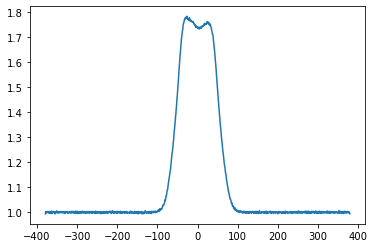

In [14]:
(phis_all['mon_norm'] + phis_all['crd_norm']).plot()

In [23]:
phis_all.loc[-10.25:10.25,:]

,mon,crd,mon_by_size,crd_by_size,mon_norm,crd_norm,sum_rule,sum_rule_norm,sum_over_crd
-10.25,180.655561,11.315596,180.655561,1.885933,1.011201,0.745405,182.541494,1.007489,2.530077
-9.75,180.390440,11.310110,180.390440,1.885018,1.009717,0.745044,182.275458,1.006021,2.530077
-9.25,180.372269,11.323050,180.372269,1.887175,1.009615,0.745896,182.259443,1.005933,2.530077
-8.75,180.140341,11.328709,180.140341,1.888118,1.008317,0.746269,182.028460,1.004658,2.530077
-8.25,179.565284,11.322378,179.565284,1.887063,1.005098,0.745852,181.452347,1.001478,2.530077
-7.75,179.281655,11.352396,179.281655,1.892066,1.003511,0.747829,181.173721,0.999940,2.530077
-7.25,179.105486,11.312975,179.105486,1.885496,1.002524,0.745232,180.990982,0.998932,2.530077
-6.75,178.783426,11.371227,178.783426,1.895204,1.000722,0.749070,180.678630,0.997208,2.530077
-6.25,178.316042,11.384323,178.316042,1.897387,0.998106,0.749933,180.213429,0.994640,2.530077
-5.75,177.902413,11.383102,177.902413,1.897184,0.995790,0.749852,179.799597,0.992356,2.530077


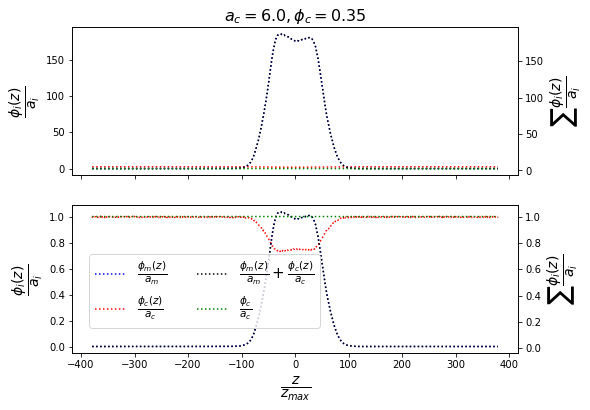

In [32]:
properties_ens_avg_norm = pd.read_csv("properties-all_in_one-ens_avg-normalized.csv",header=0,index_col=0)
folder_analysis_group = folder+"-analysis_grouped/"
filename="N2000D30.0ac6.0nc1068"
direction='z'
fontsize =16
phis_mon = pd.read_csv(folder_analysis_group+filename+'-'+direction+"PhisMon-ens_avg.csv",header=0,index_col=0)
phis_crd = pd.read_csv(folder_analysis_group+filename+'-'+direction+"PhisCrd-ens_avg.csv",header=0,index_col=0)
phis_all = pd.concat([phis_mon, phis_crd], axis=1)
phis_all.columns = ['mon','crd']

phi_c_eff = properties_ens_avg_norm[properties_ens_avg_norm.filename==phis_mon.columns[0]].vfrc_crowd_eff.values[0]
d_mon = properties_ens_avg_norm[properties_ens_avg_norm.filename==phis_mon.columns[0]].dmon.values[0]
vfrc_mon = properties_ens_avg_norm[properties_ens_avg_norm.filename==phis_mon.columns[0]].vfrc_m.values[0]
d_crowd = properties_ens_avg_norm[properties_ens_avg_norm.filename==phis_mon.columns[0]].dcrowd.values[0]
vfrc_crowd = properties_ens_avg_norm[properties_ens_avg_norm.filename==phis_mon.columns[0]].vfrc_crowd.values[0]


if direction == 'r':
    phi_crd_infinity = phis_all['mon'].max()
    phi_mon_origin = phis_all['crd'].max()
else:
    phi_crd_infinity = phis_all[phis_all['mon']==0.0]['crd'].mean()
    around_center = 20
    phis_index = phis_all.index
    non_zero_phis_mon = phis_all['mon']!= 0.0
    non_zero_phis_mon = non_zero_phis_mon.to_numpy().flatten()
    non_zero_phis_mon_index = phis_index[non_zero_phis_mon]
    non_zero_phis_mon_index_near_center = non_zero_phis_mon_index[(non_zero_phis_mon_index<around_center) & (non_zero_phis_mon_index>-1*around_center)]
    phi_mon_origin = phis_all.loc[non_zero_phis_mon_index_near_center,'mon'].mean()
    
phis_all['mon_by_size'] = phis_all['mon'] / d_mon
phis_all['crd_by_size'] = phis_all['crd'] / d_crowd



phis_all['mon_norm'] = phis_all['mon_by_size'] / (phi_mon_origin / d_mon)
phis_all['crd_norm'] = phis_all['crd_by_size'] / (phi_crd_infinity / d_crowd)
phis_all['sum_rule'] = phis_all['mon_by_size'] + phis_all['crd_by_size']
#phis_all['mon_s_norm'] = phis_all['mon_norm'] /phis_all['mon_norm'].sum()
#phis_all['crd_sum_rule_norm'] = phis_all['crd_norm'] / phis_all['crd_norm'].sum()

phis_all['sum_rule_norm'] = (phis_all['mon_by_size'] + phis_all['crd_by_size']) / ((phi_mon_origin/d_mon)+(phi_crd_infinity/d_crowd))
phis_all['sum_over_crd'] = phi_crd_infinity / d_crowd
phis_all['sum_over_crd_norm'] = phis_all['sum_over_crd'] / (phi_crd_infinity / d_crowd)
#phis_all.set_index(phis_all.index/phis_all.index.max(),inplace=True)
#phis_all['sum_over_crd_norm'] = phis_all['sum_over_crd'] / phis_all['sum_over_crd'].sum()
fig, axes = plt.subplots(2,1,figsize=(8,6),sharex=True)
#axes.tick_params(axis ='both',direction='inout',width=1)
axis0_sum = axes[0].twinx()
axes[0].set_title(r"$a_c={},\phi_c={:3.2f}$".format(d_crowd,phi_c_eff),fontsize=fontsize)
axes[0].plot(phis_all['mon_by_size'],ls=':',c='blue')
axes[0].plot(phis_all['crd_by_size'],ls=':',c='red')
axis0_sum.plot(phis_all['sum_rule'],ls=':',c='black')
axis0_sum.plot(phis_all['sum_over_crd'],ls=':',c='g')
#fig.legend(fontsize=fontsize+2)
axes[0].set_ylabel(r'$\frac{\phi_i('+direction+')}{a_i}$',fontsize=fontsize+4)
axis0_sum.set_ylabel(r'$\sum\frac{\phi_i('+direction+')}{a_i}$',fontsize=fontsize+4)
#if direction == 'z':
 #   PipeLine.xticks(axes[0],(-1,1,0.2,0.04),code=True,fontsize=fontsize,decimals=3)
  #  PipeLine.yticks(axes[0],(0,1,0.2,0.04),code=True,fontsize=fontsize,decimals=4)
   # PipeLine.yticks(axis0_sum,(0,5.2,0.2,0.04),code=True,fontsize=fontsize,decimals=4)
#else:
 #   PipeLine.xticks(axes[0],(0,1,0.2,0.04),code=True,fontsize=fontsize,decimals=3)
    #PipeLine.yticks(axes[0],(0,0.012,0.002,0.0004),code=True,fontsize=fontsize,decimals=3)

axis1_sum = axes[1].twinx()
axes[1].plot(phis_all['mon_norm'],label=r'$\frac{\phi_m('+direction+')}{a_m}$',ls=':',c='blue')
axes[1].plot(phis_all['crd_norm'],label=r'$\frac{\phi_c('+direction+')}{a_c}$',ls=':',c='red')
axis1_sum.plot(phis_all['sum_rule_norm'],label=r'$\frac{\phi_m('+direction+r')}{a_m}+\frac{\phi_c('+direction+')}{a_c}$',ls=':',c='black')
axis1_sum.plot(phis_all['sum_over_crd_norm'],label=r'$\frac{\phi_c}{a_c}$',ls=':',c='g')
fig.legend(fontsize=fontsize-1,ncol=2,loc=(0.15,0.2))
axes[1].set_ylabel(r'$\frac{\phi_i('+direction+')}{a_i}$',fontsize=fontsize+4)
axis1_sum.set_ylabel(r'$\sum\frac{\phi_i('+direction+')}{a_i}$',fontsize=fontsize+4)
axes[1].set_xlabel(r'$\frac{'+direction+'}{'+direction+'_{max}}$',fontsize=fontsize+4)

#if direction == 'z':
 #   PipeLine.xticks(axes[1],(-1,1,0.2,0.04),code=True,fontsize=fontsize,decimals=3)
  #  PipeLine.yticks(axes[1],(0,1.2,0.2,0.04),code=True,fontsize=fontsize,decimals=4)
   # PipeLine.yticks(axis1_sum,(0,1.2,0.2,0.04),code=True,fontsize=fontsize,decimals=4)
#else:
 #   PipeLine.xticks(axes[1],(0,1,0.2,0.04),code=True,fontsize=fontsize,decimals=3)
  #  PipeLine.yticks(axes[1],(0,0.06,0.01,0.005),code=True,fontsize=fontsize,decimals=3)
plt.show()
fig.tight_layout()
fig.savefig(filename+'-'+direction+"-sum_rule.pdf")

In [ ]:
properties_ens_avg_norm = pd.read_csv("properties-all_in_one-ens_avg-normalized.csv",header=0,index_col=0)
folder_analysis_group = folder+"-analysis_grouped/"
filename="N2000D30.0ac6.0nc1068"
direction='r'
fontsize =16
phis_mon = pd.read_csv(folder_analysis_group+filename+'-'+direction+"PhisMon-ens_avg.csv",header=0,index_col=0)
phis_crd = pd.read_csv(folder_analysis_group+filename+'-'+direction+"PhisCrd-ens_avg.csv",header=0,index_col=0)
phis_all = pd.concat([phis_mon, phis_crd], axis=1)

phi_c_eff = properties_ens_avg_norm[properties_ens_avg_norm.filename==phis_mon.columns[0]].vfrc_crowd_eff.values[0]
d_mon = properties_ens_avg_norm[properties_ens_avg_norm.filename==phis_mon.columns[0]].dmon.values[0]
vfrc_mon = properties_ens_avg_norm[properties_ens_avg_norm.filename==phis_mon.columns[0]].vfrc_m.values[0]
d_crowd = properties_ens_avg_norm[properties_ens_avg_norm.filename==phis_mon.columns[0]].dcrowd.values[0]
vfrc_crowd = properties_ens_avg_norm[properties_ens_avg_norm.filename==phis_mon.columns[0]].vfrc_crowd.values[0]

n_frames_analysis = 14001
phis_all.columns = ['mon','crd']
phis_all['mon'] = phis_all['mon'] / d_mon
phis_all['crd'] = phis_all['crd'] / d_crowd


phis_index = phis_all['mon'].index
non_zero_phis_mon = phis_all['mon']!= 0.0
non_zero_phis_mon = non_zero_phis_mon.to_numpy().flatten()
non_zero_phis_mon_index = phis_index[non_zero_phis_mon]
around_center = 20
non_zero_phis_mon_index_near_center = non_zero_phis_mon_index[(non_zero_phis_mon_index<around_center) & (non_zero_phis_mon_index>-1*around_center)]
phis_mno_near_center = phis_all.loc[non_zero_phis_mon_index_near_center,'mon']
phi_mon_origin= phis_mno_near_center.mean()
phi_crd_infinity = phis_all['crd'][phis_all['mon']==0.0].mean()

phis_all.set_index(phis_all.index/phis_all.index.max(),inplace=True)

phis_all['mon_norm'] = phis_all['mon'] / (phi_mon_origin)
phis_all['crd_norm'] = phis_all['crd'] / (phi_crd_infinity)
phis_all['sum_rule'] = phis_all['mon_norm'] + phis_all['crd_norm']

#phis_all['mon_s_norm'] = phis_all['mon_norm'] /phis_all['mon_norm'].sum()
#phis_all['crd_sum_rule_norm'] = phis_all['crd_norm'] / phis_all['crd_norm'].sum()

phis_all['sum_rule_norm'] = phis_all['sum_rule'] / ((phi_mon_origin/d_mon)+(phi_crd_infinity/d_crowd))
phis_all['sum_over_crd'] = phi_crd_infinity / phi_crd_infinity
#phis_all['sum_over_crd_norm'] = phis_all['sum_over_crd'] / phis_all['sum_over_crd'].sum()
fig, axes = plt.subplots(1,1,figsize=(8,6),sharex=True)
#axes.tick_params(axis ='both',direction='inout',width=1)
axis0_sum = axes.twinx()
axes.set_title(r"$a_c={},\phi_c(bulk)={:3.2f}$".format(d_crowd,phi_c_eff),fontsize=fontsize)
axes.plot(phis_all['mon_norm'],label=r'$\frac{\phi_m('+direction+')}{a_m}$',ls=':',c='blue')
axes.plot(phis_all['crd_norm'],label=r'$\frac{\phi_c('+direction+')}{a_c}$',ls=':',c='red')
axes.plot(phis_all['sum_rule'],label=r'$\frac{\phi_m('+direction+r')}{a_m}+\frac{\phi_c('+direction+')}{a_c}$',ls=':',c='black')
axes.plot(phis_all['sum_over_crd'],label=r'$\frac{\phi_c}{a_c}$',ls=':',c='g')
axes.set_ylabel(r'$\frac{\phi_i('+direction+')}{a_i}$',fontsize=fontsize+4)
axis0_sum.set_ylabel(r'$\sum\frac{\phi_i('+direction+')}{a_i}$',fontsize=fontsize+4)
axes.set_xlabel(r'$\frac{'+direction+'}{'+direction+'_{max}}$',fontsize=fontsize+4)
axes.legend(fontsize=fontsize-1,ncol=1)
#if direction == 'z':
 #   PipeLine.xticks(axes,(-1,1,0.2,0.04),code=True,fontsize=fontsize,decimals=3)
  #  PipeLine.yticks(axes,(0,1.8,0.2,0.04),code=True,fontsize=fontsize,decimals=4)
   # PipeLine.yticks(axis0_sum,(0,1.8,0.2,0.04),code=True,fontsize=fontsize,decimals=4)
#else:
 #   PipeLine.xticks(axes,(0,1,0.2,0.04),code=True,fontsize=fontsize,decimals=3)
    #PipeLine.yticks(axes[0],(0,0.012,0.002,0.0004),code=True,fontsize=fontsize,decimals=3)
plt.show()
fig.tight_layout()
fig.savefig(filename+'-'+direction+"-sum_rule.pdf")

In [ ]:
## theta graops
folder_analysis_group = folder+"-analysis_grouped/"
filename="N2000D30.0ac6.0nc1068"
direction='theta'
hists_mon = pd.read_csv(folder_analysis_group+filename+'-'+direction+"HistsMon.csv",header=0,index_col=0)
hists_crd = pd.read_csv(folder_analysis_group+filename+'-'+direction+"HistsCrd.csv",header=0,index_col=0)
fig, axes = plt.subplots(1,2,figsize=(8,6),sharex=True)
axes[0].plot(hists_mon)
axes[0].set_title('hist mon '+direction)
axes[1].plot(hists_crd)
axes[1].set_title('hist crd '+direction)
plt.show()
fig.savefig(filename+direction+".pdf")

In [ ]:

folder_analysis_group = folder+"-analysis_grouped/"
filename="N2000D30.0ac6.0nc1068"
direction='theta'
rhists_mon = pd.read_csv(folder_analysis_group+filename+'-'+direction+"HistsMon-ens_avg.csv",header=0,index_col=0)
rhists_crd = pd.read_csv(folder_analysis_group+filename+'-'+direction+"HistsCrd-ens_avg.csv",header=0,index_col=0)
fig, axes = plt.subplots(1,2,figsize=(8,6),sharex=True)
axes[0].plot(rhists_mon)
axes[0].set_title('hist mon '+direction)
axes[1].plot(rhists_crd)
axes[1].set_title('hist crd '+direction)
plt.show()
fig.savefig(filename+direction+"-ens_avg.pdf")

### plot over some range

In [ ]:
folder = "./N2000epsilon5.0r15.5lz379.5sig6.0nc1068dt0.005bdump1000adump5000-absolute_z-analysis-grouped/"
filename="N2000D30.0ac6.0nc1068binFactor0.1"
direction='z'
rhists_mon = pd.read_csv(folder+filename+'-'+direction+"HistsMon.csv",header=0,index_col=0)
rhists_crd = pd.read_csv(folder+filename+'-'+direction+"HistsCrd.csv",header=0,index_col=0)
rrhos_mon = pd.read_csv(folder+filename+'-'+direction+"RhosMon.csv",header=0,index_col=0)
rrhos_crd = pd.read_csv(folder+filename+'-'+direction+"RhosCrd.csv",header=0,index_col=0)
rphis_mon = pd.read_csv(folder+filename+'-'+direction+"PhisMon.csv",header=0,index_col=0)
rphis_crd = pd.read_csv(folder+filename+'-'+direction+"PhisCrd.csv",header=0,index_col=0)
ranges=1
fig, axes = plt.subplots(3,2,figsize=(8,6),sharex=True)
axes[0,0].plot(rrhos_mon.iloc[ranges:-1*ranges,:])
axes[0,0].set_title('rho mon '+direction)
axes[1,0].plot(rphis_mon.iloc[ranges:-1*ranges,:])
axes[1,0].set_title('phi mon '+direction)
axes[2,0].plot(rhists_mon.iloc[ranges:-1*ranges,:])
axes[2,0].set_title('hist mon '+direction)
axes[0,1].plot(rrhos_crd.iloc[ranges:-1*ranges,:])
axes[0,1].set_title('rho crd '+direction)
axes[1,1].plot(rphis_crd.iloc[ranges:-1*ranges,:])
axes[1,1].set_title('phi crd '+direction)
axes[2,1].plot(rhists_crd.iloc[ranges:-1*ranges,:])
axes[2,1].set_title('hist crd '+direction)
plt.show()
fig.savefig(filename+direction+".pdf")

In [ ]:
folder = "./N2000epsilon5.0r15.5lz379.5sig6.0nc1068dt0.005bdump1000adump5000-absolute_z-analysis-grouped-new_find_bounds/"
filename="N2000D30.0ac6.0nc1068binFactor0.2"
direction='z'
rhists_mon = pd.read_csv(folder+filename+'-'+direction+"HistsMon-ens_avg.csv",header=0,index_col=0)
rhists_crd = pd.read_csv(folder+filename+'-'+direction+"HistsCrd-ens_avg.csv",header=0,index_col=0)
rrhos_mon = pd.read_csv(folder+filename+'-'+direction+"RhosMon-ens_avg.csv",header=0,index_col=0)
rrhos_crd = pd.read_csv(folder+filename+'-'+direction+"RhosCrd-ens_avg.csv",header=0,index_col=0)
rphis_mon = pd.read_csv(folder+filename+'-'+direction+"PhisMon-ens_avg.csv",header=0,index_col=0)
rphis_crd = pd.read_csv(folder+filename+'-'+direction+"PhisCrd-ens_avg.csv",header=0,index_col=0)

ranges=100
fig, axes = plt.subplots(3,2,figsize=(8,6),sharex=True)
axes[0,0].plot(rrhos_mon.iloc[ranges:-1*ranges,:])
axes[0,0].set_title('rho mon '+direction)
axes[1,0].plot(rphis_mon.iloc[ranges:-1*ranges,:])
axes[1,0].set_title('phi mon '+direction)
axes[2,0].plot(rhists_mon.iloc[ranges:-1*ranges,:])
axes[2,0].set_title('hist mon '+direction)
axes[0,1].plot(rrhos_crd.iloc[ranges:-1*ranges,:])
axes[0,1].set_title('rho crd '+direction)
axes[1,1].plot(rphis_crd.iloc[ranges:-1*ranges,:])
axes[1,1].set_title('phi crd '+direction)
axes[2,1].plot(rhists_crd.iloc[ranges:-1*ranges,:])
axes[2,1].set_title('hist crd '+direction)
plt.show()
fig.savefig(filename+direction+"-ens_avg-new.pdf")

In [ ]:
rhists_crd

## all distributions

In [ ]:
#properties all in one:
csv_files = glob("../sumrule_data/N*/*.csv")
properties_file = glob("../sumrule_data/properties-all_in_one.csv")
#csv_files = glob("../sumrule_data/N*/*.csv")
all_properties = pd.read_csv("../sumrule_data/properties-all_in_one.csv",header=0,index_col=0)
properties_ens_avg = pd.read_csv("../sumrule_data/properties-all_in_one-ens_avg-normalized.csv",header=0,index_col=0)

In [ ]:
rhist_ensembles_crd = PipeLine.simulation_from_segments(csv_files,'rHistsCrd', geometry,['_rHistsCrd.csv','_rEdgesCrd.csv'])
rhist_ensembles_mon = PipeLine.simulation_from_segments(csv_files,'rHistsMon', geometry,['_rHistsMon.csv','_rEdgesMon.csv'])
_, _ = PipeLine.distributions_generator(rhist_ensembles_crd, all_properties, 'dcrowd',geometry,'radial','Crd')
_, _ = PipeLine.distributions_generator(rhist_ensembles_mon, all_properties, 'dmon', geometry,'radial','Mon')

zhist_ensembles_crd = PipeLine.simulation_from_segments(csv_files,'zHistsCrd',geometry,['_zHistsCrd.csv','_zEdgesCrd.csv'])
zhist_ensembles_mon = PipeLine.simulation_from_segments(csv_files,'zHistsMon',geometry,['_zHistsMon.csv','_zEdgesMon.csv'])
_, _ = PipeLine.distributions_generator(zhist_ensembles_crd, all_properties, 'dcrowd', geometry,'longitudinal','Crd')
_, _ = PipeLine.distributions_generator(zhist_ensembles_mon, all_properties, 'dmon', geometry,'longitudinal','Mon')

thetahist_ensembles_crd = PipeLine.simulation_from_segments(csv_files,'thetaHistsCrd', geometry,['_thetaHistsCrd.csv','_thetaEdgesCrd.csv'])
thetahist_ensembles_mon = PipeLine.simulation_from_segments(csv_files,'thetaHistsMon', geometry,['_thetaHistsMon.csv','_thetaEdgesMon.csv'])

In [ ]:
# analyze all hists: create ensembles from simulations:
csv_files = glob("./N*.csv")
#csv_files = glob("../N2000D25.0ac1.0phic0.325_0.4-analyze_segments/N*.csv")
hist_names = ['rHistsCrd','rHistsMon','zHistsCrd','zHistsMon','rHistsCrd','thetaHistsCrd','thetaHistsMon','rPhisCrd','rPhisMon','rRhosCrd','rRhosMon','zPhisCrd','zPhisMon','zRhosCrd','zRhosMon']
geometry = 'cylindrical'
seperator = '-'
for hist_name in hist_names:
    ext = [seperator+hist_name+'.csv']
    hist_files = PipeLine.file_reader(csv_files,extensions=ext)
    hist_dicts = PipeLine.ensemble(hist_files,hist_name,geometry,sep=seperator,index_col=0,skiprows=1)
    ens_evg_dict_rhist = PipeLine.group(hist_dicts,hist_name,geometry)
    #ens_evg_dict_rhist = PipeLine.grooup_properties(all_properties,hist_dicts,hist_name,geometry)

In [ ]:
rhists_mon = pd.read_csv("./N2000D30.0ac6.0nc1068-rHistsMon.csv",header=0,index_col=0)
rhists_crd = pd.read_csv("./N2000D30.0ac6.0nc1068-rHistsCrd.csv",header=0,index_col=0)
rrhos_mon = pd.read_csv("./N2000D30.0ac6.0nc1068-rRhosMon.csv",header=0,index_col=0)
rrhos_crd = pd.read_csv("./N2000D30.0ac6.0nc1068-rRhosCrd.csv",header=0,index_col=0)
rphis_mon = pd.read_csv("./N2000D30.0ac6.0nc1068-rPhisMon.csv",header=0,index_col=0)
rphis_crd = pd.read_csv("./N2000D30.0ac6.0nc1068-rPhisCrd.csv",header=0,index_col=0)

In [ ]:
fig, axes = plt.subplots(3,2,figsize=(8,6),sharex=True)

axes[0,0].plot(rrhos_mon)
axes[0,0].set_title('rho mon r')
axes[1,0].plot(rphis_mon)
axes[1,0].set_title('phi mon r')
axes[2,0].plot(rhists_mon)
axes[2,0].set_title('hist mon r')

axes[0,1].plot(rrhos_crd)
axes[0,1].set_title('rho crd r')
axes[1,1].plot(rphis_crd)
axes[1,1].set_title('phi crd r')
axes[2,1].plot(rhists_crd)
axes[2,1].set_title('hist crd r')

plt.show()

In [ ]:
rhists_mon = pd.read_csv("./N2000D30.0ac6.0nc1068-rHistsMon-ens_avg.csv",header=0,index_col=0)
rhists_crd = pd.read_csv("./N2000D30.0ac6.0nc1068-rHistsCrd-ens_avg.csv",header=0,index_col=0)
rrhos_mon = pd.read_csv("./N2000D30.0ac6.0nc1068-rRhosMon-ens_avg.csv",header=0,index_col=0)
rrhos_crd = pd.read_csv("./N2000D30.0ac6.0nc1068-rRhosCrd-ens_avg.csv",header=0,index_col=0)
rphis_mon = pd.read_csv("./N2000D30.0ac6.0nc1068-rPhisMon-ens_avg.csv",header=0,index_col=0)
rphis_crd = pd.read_csv("./N2000D30.0ac6.0nc1068-rPhisCrd-ens_avg.csv",header=0,index_col=0)

In [ ]:
fig, axes = plt.subplots(3,2,figsize=(8,6),sharex=True)

axes[0,0].plot(rrhos_mon)
axes[0,0].set_title('rho mon r')
axes[1,0].plot(rphis_mon)
axes[1,0].set_title('phi mon r')
axes[2,0].plot(rhists_mon)
axes[2,0].set_title('hist mon r')

axes[0,1].plot(rrhos_crd)
axes[0,1].set_title('rho crd r')
axes[1,1].plot(rphis_crd)
axes[1,1].set_title('phi crd r')
axes[2,1].plot(rhists_crd)
axes[2,1].set_title('hist crd r')

plt.show()

In [ ]:
zhists_mon = pd.read_csv("./N2000D30.0ac6.0nc1068-zHistsMon.csv",header=0,index_col=0)
zhists_crd = pd.read_csv("./N2000D30.0ac6.0nc1068-zHistsCrd.csv",header=0,index_col=0)
zrhos_mon = pd.read_csv("./N2000D30.0ac6.0nc1068-zRhosMon.csv",header=0,index_col=0)
zrhos_crd = pd.read_csv("./N2000D30.0ac6.0nc1068-zRhosCrd.csv",header=0,index_col=0)
zphis_mon = pd.read_csv("./N2000D30.0ac6.0nc1068-zPhisMon.csv",header=0,index_col=0)
zphis_crd = pd.read_csv("./N2000D30.0ac6.0nc1068-zPhisCrd.csv",header=0,index_col=0)

In [ ]:
fig, axes = plt.subplots(3,2,figsize=(8,6),sharex=True)

axes[0,0].plot(zrhos_mon)
axes[0,0].set_title('rho mon z')
axes[1,0].plot(zphis_mon)
axes[1,0].set_title('phi mon z')
axes[2,0].plot(zhists_mon)
axes[2,0].set_title('hist mon z')

axes[0,1].plot(zrhos_crd)
axes[0,1].set_title('rho crd z')
axes[1,1].plot(zphis_crd)
axes[1,1].set_title('phi crd z')
axes[2,1].plot(zhists_crd)
axes[2,1].set_title('hist crd z')

plt.show()

In [ ]:
zhists_mon = pd.read_csv("./N2000D30.0ac6.0nc1068-zHistsMon-ens_avg.csv",header=0,index_col=0)
zhists_crd = pd.read_csv("./N2000D30.0ac6.0nc1068-zHistsCrd-ens_avg.csv",header=0,index_col=0)
zrhos_mon = pd.read_csv("./N2000D30.0ac6.0nc1068-zRhosMon-ens_avg.csv",header=0,index_col=0)
zrhos_crd = pd.read_csv("./N2000D30.0ac6.0nc1068-zRhosCrd-ens_avg.csv",header=0,index_col=0)
zphis_mon = pd.read_csv("./N2000D30.0ac6.0nc1068-zPhisMon-ens_avg.csv",header=0,index_col=0)
zphis_crd = pd.read_csv("./N2000D30.0ac6.0nc1068-zPhisCrd-ens_avg.csv",header=0,index_col=0)

In [ ]:
fig, axes = plt.subplots(3,2,figsize=(8,6),sharex=True)

axes[0,0].plot(zrhos_mon)
axes[0,0].set_title('rho mon z')
axes[1,0].plot(zphis_mon)
axes[1,0].set_title('phi mon z')
axes[2,0].plot(zhists_mon)
axes[2,0].set_title('hist mon z')

axes[0,1].plot(zrhos_crd)
axes[0,1].set_title('rho crd z')
axes[1,1].plot(zphis_crd)
axes[1,1].set_title('phi crd z')
axes[2,1].plot(zhists_crd)
axes[2,1].set_title('hist crd z')

plt.show()